# Прогноз поведения клиентов банка

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score,  confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import math

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [2]:
data=pd.read_csv("datasets/Churn.csv", index_col=0)

In [3]:
data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


<div style="border:solid  green  2px; padding: 20px">
    <H2>Описание данных</H2>
    - RowNumber — индекс строки в данных<br>
    - CustomerId — уникальный идентификатор клиента<br>
    - Surname — фамилия<br>
    - CreditScore — кредитный рейтинг<br>
    - Geography — страна проживания<br>
    - Gender — пол<br>
    - Age — возраст<br>
    - Tenure — количество недвижимости у клиента<br>
    - Balance — баланс на счёте<br>
    - NumOfProducts — количество продуктов банка, используемых клиентом<br>
    - HasCrCard — наличие кредитной карты<br>
    - IsActiveMember — активность клиента<br>
    - EstimatedSalary — предполагаемая зарплата<br>
    <div style="border:solid  orange  2px; padding: 20px">
        - Exited — факт ухода клиента<br>
    </div>
</div>

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [6]:
unique_name=data.Surname.unique()
print("Уникальных имён:",len(unique_name))
data.Surname.value_counts()

Уникальных имён: 2932


Smith      32
Martin     29
Scott      29
Walker     28
Brown      26
           ..
Gebhart     1
Du Cane     1
Threatt     1
Yost        1
Yancy       1
Name: Surname, Length: 2932, dtype: int64

In [7]:
len(data.CustomerId.unique())

10000

In [8]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

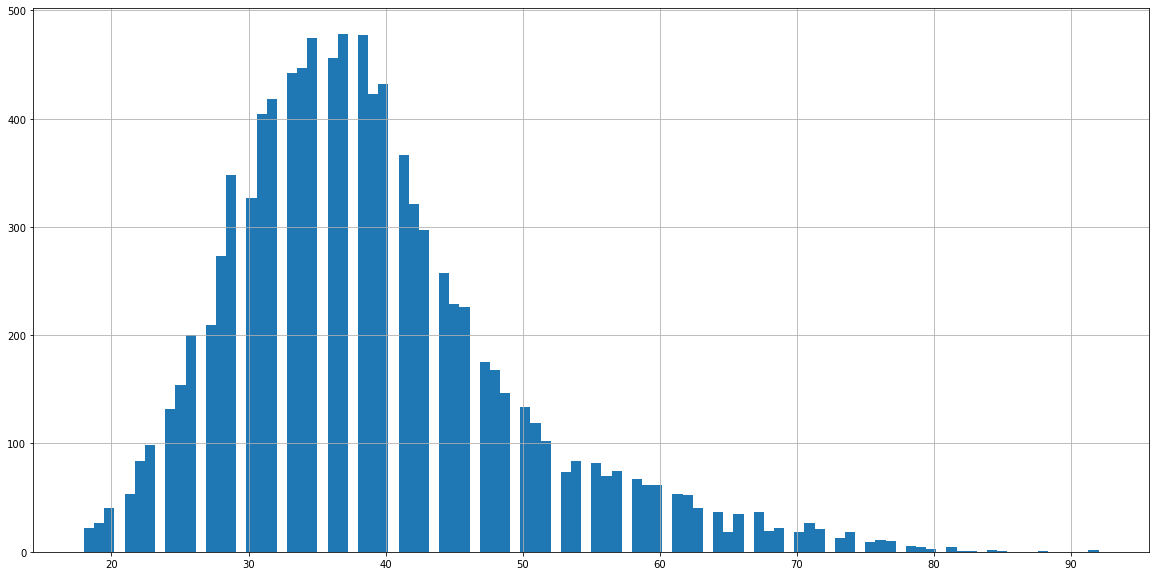

In [10]:
data.Age.hist(bins=100, figsize=(20,10))

In [11]:
data[data.Tenure.isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0


In [12]:
data.Tenure.value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

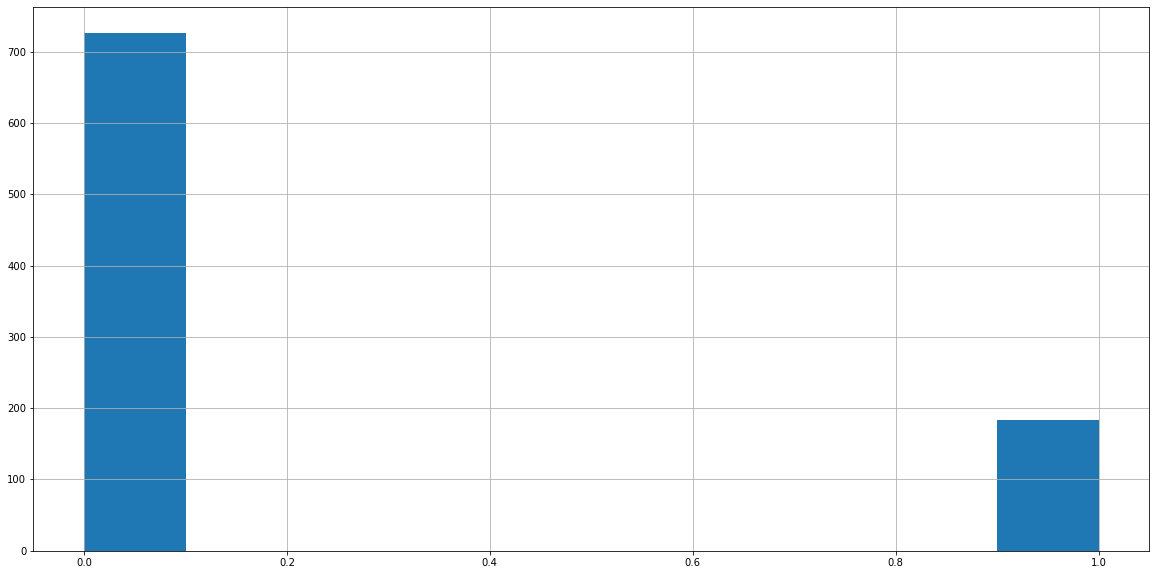

In [13]:
data[data.Tenure.isnull()].Exited.hist(figsize=(20,10))

In [14]:
data.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [15]:
data.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [16]:
data.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

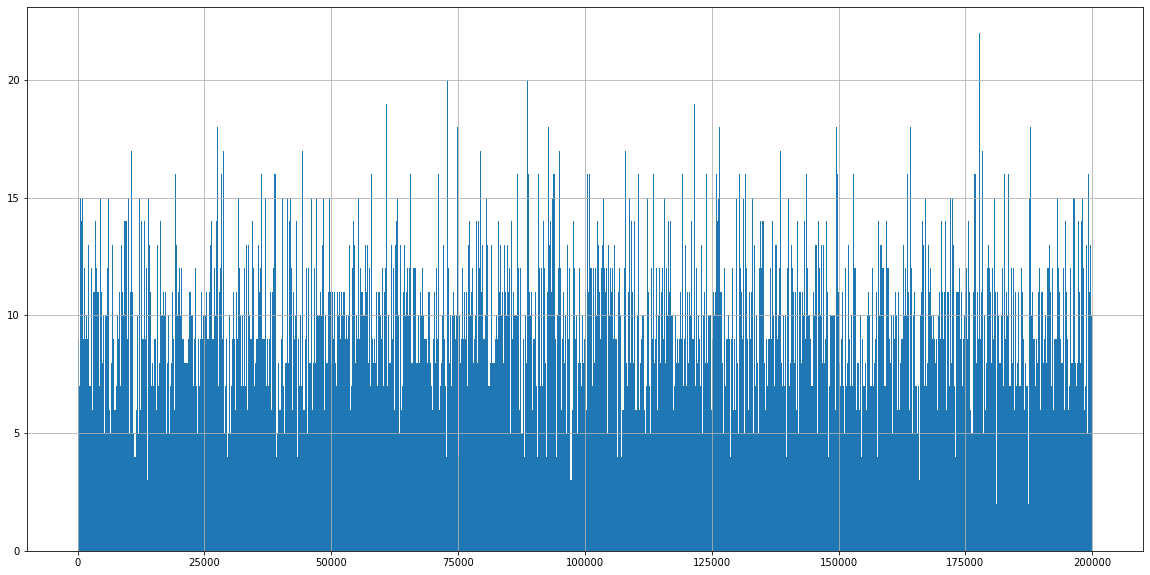

In [17]:
data.EstimatedSalary.hist(bins=1000, figsize=(20,10))

In [18]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [19]:
#Выбрасываем строки с пустими ячейками о количестве недвижимости
data.dropna(inplace=True, axis=0)
#Преобразуем столбец с количеством недвижимости к целым числам
data.Tenure=data.Tenure.astype('int64')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 1 to 9999
Data columns (total 13 columns):
CustomerId         9091 non-null int64
Surname            9091 non-null object
CreditScore        9091 non-null int64
Geography          9091 non-null object
Gender             9091 non-null object
Age                9091 non-null int64
Tenure             9091 non-null int64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 994.3+ KB


In [21]:
#Удаляем столбец с фамилией
data=data.drop(['Surname'], axis=1, errors='ignore')

In [22]:
data=pd.get_dummies(data, drop_first=True)

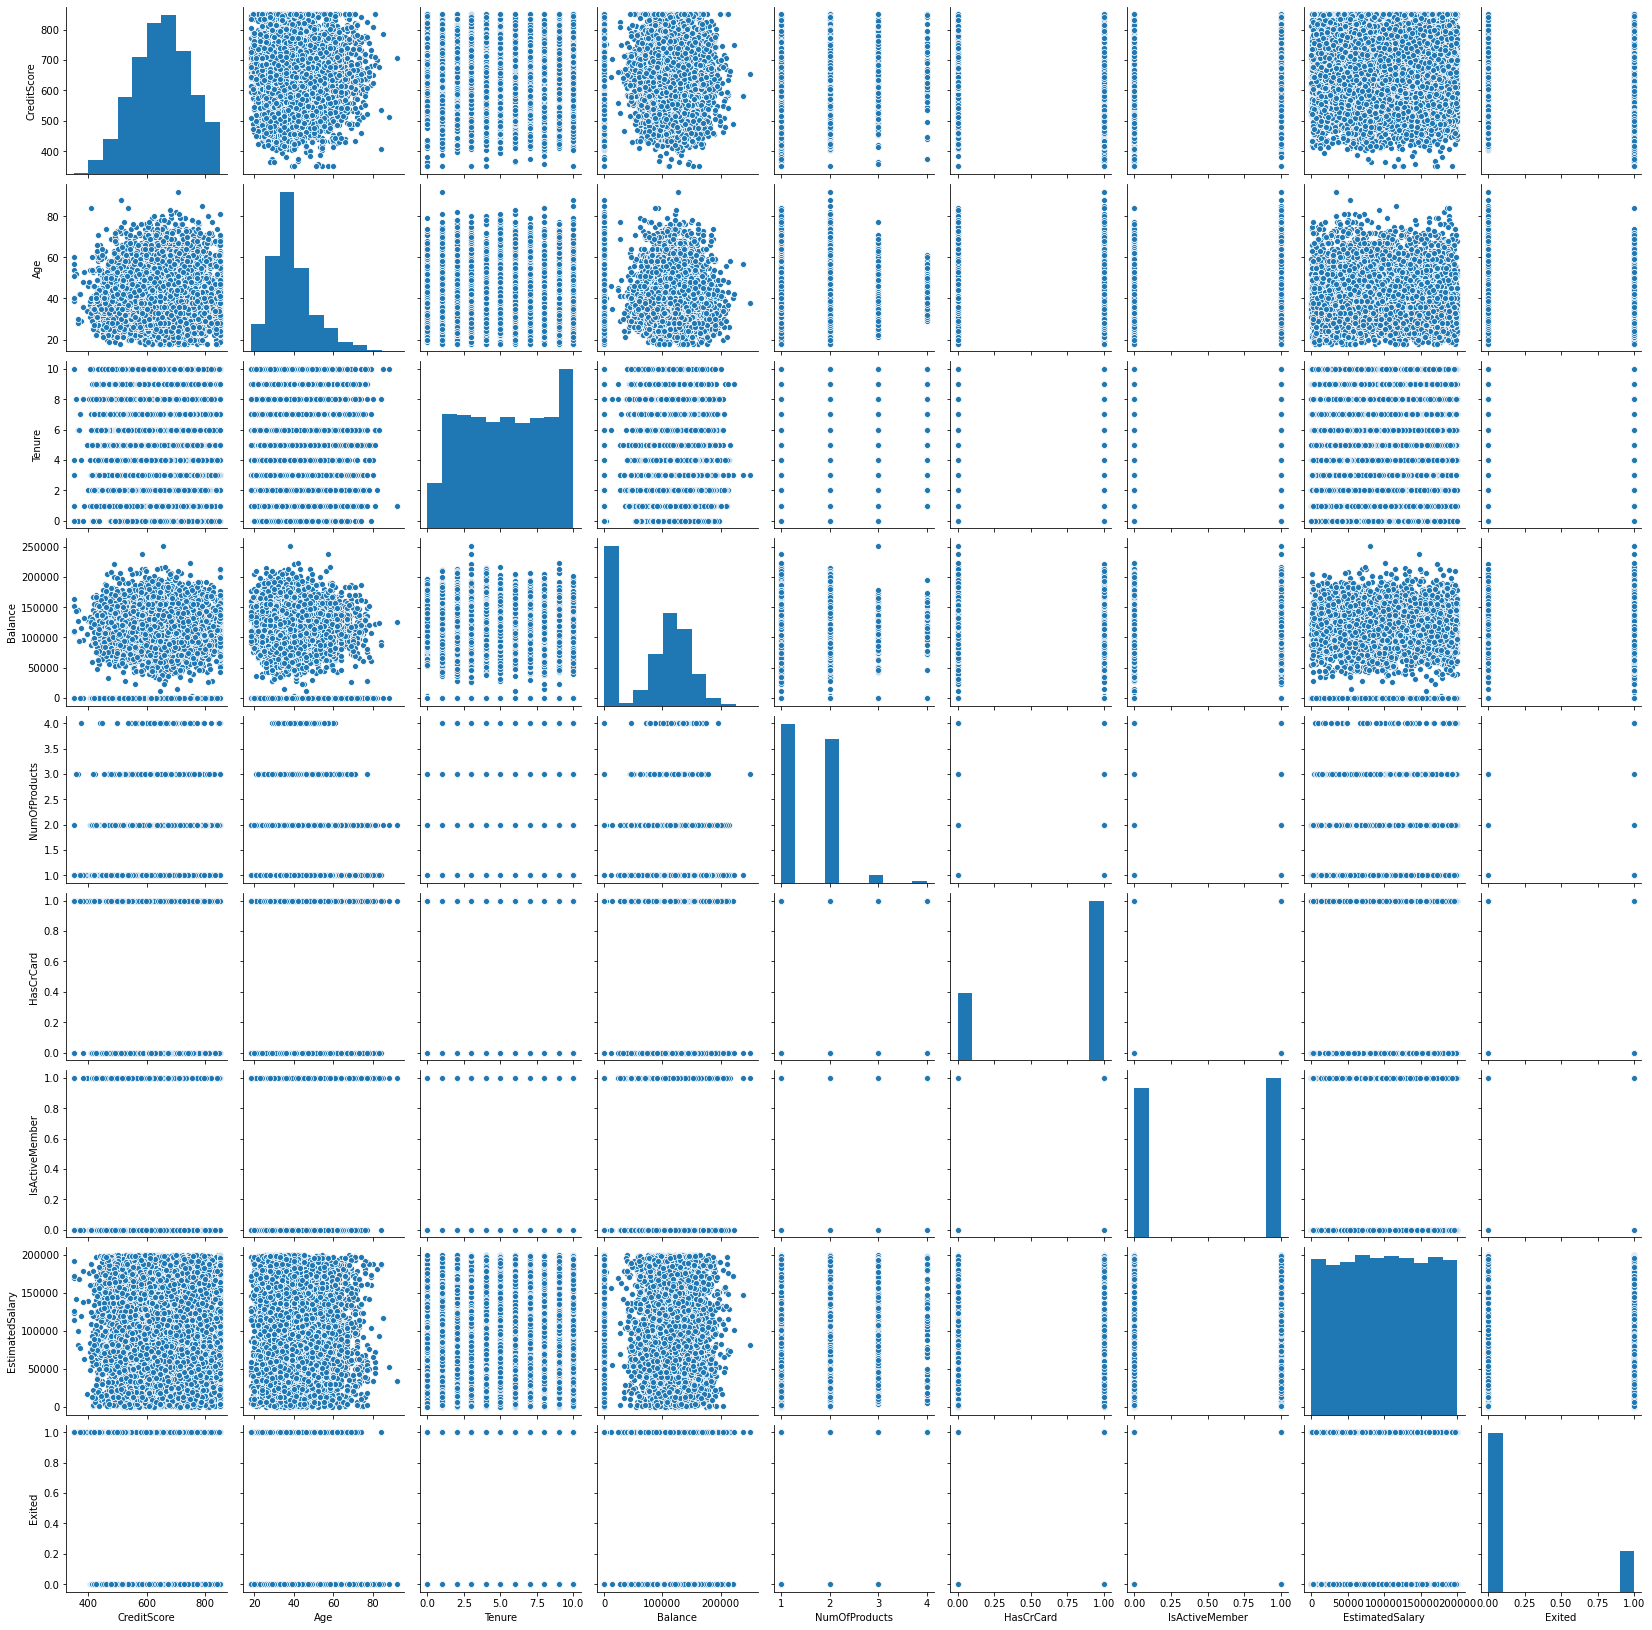

In [23]:
sns.pairplot(data.drop(['CustomerId', 
                        'Geography_Germany',
                        'Geography_Spain',
                        'Gender_Male'], axis=1))

In [24]:
#Выделим три набора тринировочный, валидационный и тестовый в соотношение 60%:20%:20%
train, test_valid=train_test_split(data, train_size=0.6, random_state=123)
test, valid =train_test_split(test_valid, train_size=0.5, random_state=123)

In [25]:
#Выделяем признаки и целевую функцию
train_features=train.drop(['Exited'],axis=1)
test_features=test.drop(['Exited'],axis=1)
valid_features=valid.drop(['Exited'],axis=1)

train_target=train['Exited']
test_target=test['Exited']
valid_target=valid['Exited']

In [26]:
#Нормируем значения
scaler=StandardScaler()
scaler.fit(train_features)

train_features_normalized=scaler.transform(train_features)
test_features_normalized=scaler.transform(test_features)
valid_features_normalized=scaler.transform(valid_features)

**Выводы**: первый столбец можно сделать в качестве индексов. В базе данных существует 2932 уникальных фамилии. В данных  присутствует информация о клиентаз только из 3 стран: Франции, Германии и Испании. По 909 клиентам нет информации о количестве недвижимости у них. Так как распределение в них целевого признака такое же, как и в генеральной совокупности, их можно дропнуть Количество записей о клиентах, которые покинули банк, в 4 раза меньше, чем тех, которые всё ещё являются его членами. Столбец с фамилией нашей нейронной сети не нужен. Для кодирования признаков Geography, Gender используется One Hot Encoding с избеганием дамми ловушки.

Деление данных осуществляется на 3 группы обучающая, валидационная и тестовая в пропорции 3:1:1 (60%:20%:20%). После разбиения численные данные подвергаются нормировке.

# Обучение без учёта дизбаланса классов

In [27]:
#Строим стационарную модель
train_pred_constant=pd.Series(0, index=train.index)
valid_pred_constant=pd.Series(0, index=valid.index)

In [28]:
#Data frame для хранения результатов
statistics_temp_1=pd.DataFrame({'model':['Статическая модель'],'isBalansed':[None]})
data_statistics_train=pd.DataFrame({'accuracy':[accuracy_score(train_target,train_pred_constant)],'recall':[recall_score(train_target,train_pred_constant)], 
                                    'precision':[precision_score(train_target,train_pred_constant)], 'f1':[f1_score(train_target,train_pred_constant)],
                                   'auc_roc':0.5})

data_statistics_valid=pd.DataFrame({'accuracy':[accuracy_score(valid_target,valid_pred_constant)],'recall':[recall_score(valid_target,valid_pred_constant)], 
                                    'precision':[precision_score(valid_target,valid_pred_constant)], 'f1':[f1_score(valid_target,valid_pred_constant)],
                                    'auc_roc':0.5})
                                   
#Объединяем DataFrame
statistics=pd.merge(pd.merge(statistics_temp_1, data_statistics_train, left_index=True, right_index=True), 
         data_statistics_valid, left_index=True, right_index=True, suffixes=['_train', '_valid'])
statistics

c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,model,isBalansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
0,Статическая модель,None,0.796296,0.0,0.0,0.0,0.5,0.783397,0.0,0.0,0.0,0.5


In [29]:
def solved_metrics(model,balansed,model_name,train_features, train_target, valid_features, valid_target):
    global statistics
    #print("-----({})-----".format(model_name))
    #Метрики на обучающем наборе
    predicted_train=model.predict(train_features)
    probabilities_train = model.predict_proba(train_features)
    probabilities_one_train = probabilities_train[:, 1]
    
    accuracy_train=accuracy_score(train_target, predicted_train)
    precision_train = precision_score(train_target, predicted_train)
    recall_train = recall_score(train_target, predicted_train)
    f1_train=f1_score(train_target, predicted_train)
    roc_auc_train=roc_auc_score(train_target,probabilities_one_train)
    
    '''
    print("Accuracy: {:.3f}, Точность: {:.3f}, Полнота: {:.3f}, F1-мера: {:.3f}".format(accuracy_train,
                                                                                        precision_train,
                                                                                        recall_train,
                                                                                        f1_train))
    '''
    #Метрики на валидационном наборе
    predicted_valid=model.predict(valid_features)
    probabilities_valid = model.predict_proba(valid_features)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    accuracy_valid=accuracy_score(valid_target, predicted_valid)
    precision_valid = precision_score(valid_target, predicted_valid)
    recall_valid = recall_score(valid_target, predicted_valid)
    f1_valid=f1_score(valid_target, predicted_valid)
    roc_auc_valid=roc_auc_score(valid_target,probabilities_one_valid)
    
    '''
    print("Accuracy: {:.3f}, Точность: {:.3f}, Полнота: {:.3f}, F1-мера: {:.3f}".format(accuracy_valid,
                                                                                        precision_valid,
                                                                                        recall_valid,
                                                                                        f1_valid))
    '''                                                                                    
    temp=pd.Series([model_name, 
                       accuracy_train, balansed, precision_train,recall_train,f1_train,roc_auc_train,
                       accuracy_valid,precision_valid,recall_valid,f1_valid, roc_auc_valid], 
                   index=statistics.columns)
    #Сохраняем в DataFrame
    statistics=statistics.append(temp,ignore_index=True)
    

In [30]:
def make_and_estimate_model(train_features, train_target, valid_features, valid_target, class_weight, balanced_type):
    #Логистическая регрессия
    model=LogisticRegression(random_state=12345, solver='liblinear',class_weight=class_weight)
    model.fit(train_features, train_target)
    solved_metrics(model, balanced_type, 'Логистическая регрессия', 
                   train_features, train_target, valid_features, valid_target)
    
    #Случайный лес
    for est in range(1,100,1):
        model=RandomForestClassifier(n_estimators=est,  random_state=12345, class_weight=class_weight)
        model.fit(train_features, train_target)
        solved_metrics(model, balanced_type,'Случайный лес: {}'.format(est),
                      train_features, train_target, valid_features, valid_target)
        
    for depth in range(1,100,1):
        model=DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight=class_weight)
        model.fit(train_features, train_target)
        solved_metrics(model, balanced_type,'Решающее дерево: {}'.format(depth),
                      train_features, train_target, valid_features, valid_target)

In [31]:
make_and_estimate_model(train_features_normalized, train_target,valid_features_normalized, valid_target, 
                       None, None)
statistics.sort_values(by='f1_valid', ascending=False)

c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

,model,isBalansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
50,Случайный лес: 49,0.999267,None,1.000000,0.996400,0.998197,1.000000,0.841121,0.731278,0.421320,0.534622,0.827800
28,Случайный лес: 27,0.998350,None,1.000000,0.991899,0.995933,0.999988,0.839472,0.719828,0.423858,0.533546,0.820592
22,Случайный лес: 21,0.997066,None,1.000000,0.985599,0.992747,0.999986,0.835624,0.692308,0.434010,0.533541,0.818269
20,Случайный лес: 19,0.996333,None,0.999085,0.982898,0.990926,0.999967,0.837273,0.704167,0.428934,0.533123,0.814814
66,Случайный лес: 65,0.999633,None,1.000000,0.998200,0.999099,1.000000,0.842771,0.747706,0.413706,0.532680,0.832246
...,...,...,...,...,...,...,...,...,...,...,...,...
3,Случайный лес: 2,0.925559,None,0.964427,0.658866,0.782888,0.952831,0.803189,0.593750,0.289340,0.389078,0.712787
103,Решающее дерево: 3,0.839017,None,0.814016,0.271827,0.407557,0.789290,0.825728,0.840708,0.241117,0.374753,0.792252
1,Логистическая регрессия,0.808214,None,0.578692,0.215122,0.313648,0.773359,0.800440,0.606897,0.223350,0.326531,0.737706
101,Решающее дерево: 1,0.796296,None,0.000000,0.000000,0.000000,0.687732,0.783397,0.000000,0.000000,0.000000,0.682352


**Вывод**: для обучения использовались такие модели машинного обучения, как DecisionTree, RandomForest, Logistic Regression и статическая модель. Полученные модели демонстрируют высокую accuracy, но из-за того что в целевом признаке присутсвует дизбаланс классов (0:75%, 1:25%), то для оценки модели следует использовать f1-метрику. Наибольшую точность демонстрирует модель случайного леса с 49 решателями.

# Обучение с учётом дизбаланса классов

## Балансировка классов с помощью изменения весов

In [32]:
make_and_estimate_model(train_features_normalized, train_target,valid_features_normalized, valid_target, 
                       'balanced', "Взвешивание классов")

In [33]:
statistics.sort_values(by='f1_valid', ascending=False)

,model,isBalansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
305,Решающее дерево: 6,0.802714,Взвешивание классов,0.510536,0.763276,0.611833,0.863676,0.766905,0.475570,0.741117,0.579365,0.826264
306,Решающее дерево: 7,0.795930,Взвешивание классов,0.499448,0.813681,0.618966,0.889812,0.752062,0.457014,0.769036,0.573321,0.823983
304,Решающее дерево: 5,0.739091,Взвешивание классов,0.424345,0.787579,0.551529,0.844385,0.722375,0.426099,0.812183,0.558952,0.827757
307,Решающее дерево: 8,0.830033,Взвешивание классов,0.554958,0.836184,0.667145,0.915283,0.747664,0.446809,0.692893,0.543284,0.789626
50,Случайный лес: 49,0.999267,None,1.000000,0.996400,0.998197,1.000000,0.841121,0.731278,0.421320,0.534622,0.827800
...,...,...,...,...,...,...,...,...,...,...,...,...
3,Случайный лес: 2,0.925559,None,0.964427,0.658866,0.782888,0.952831,0.803189,0.593750,0.289340,0.389078,0.712787
103,Решающее дерево: 3,0.839017,None,0.814016,0.271827,0.407557,0.789290,0.825728,0.840708,0.241117,0.374753,0.792252
1,Логистическая регрессия,0.808214,None,0.578692,0.215122,0.313648,0.773359,0.800440,0.606897,0.223350,0.326531,0.737706
101,Решающее дерево: 1,0.796296,None,0.000000,0.000000,0.000000,0.687732,0.783397,0.000000,0.000000,0.000000,0.682352


## Устранение дизбаланса путём увеличения выборки (upsampling)

In [34]:
def upsamping(features, target, repeat):
    features_zeros=features[target==0]
    features_ones=features[target==1]
    target_zeros=target[target==0]
    target_ones=target[target==1]
    
    features_upsampled=pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled=pd.concat([target_zeros]+[target_ones]*repeat)
    
    features_upsampled, target_upsampled=shuffle(features_upsampled, 
                                                 target_upsampled ,
                                                 random_state=12345)
    return features_upsampled, target_upsampled

In [35]:
repeat=math.ceil(len(train_target[train_target==0])/len(train_target[train_target==1]))
features_train_upsampled, target_train_upsampled=upsamping(train_features, 
                                                           train_target,
                                                           repeat)

In [36]:
#Выполним нормировку на текущих данных
scaler=StandardScaler()
scaler.fit(features_train_upsampled)

train_features_normalized=scaler.transform(features_train_upsampled)
test_features_normalized=scaler.transform(test_features)
valid_features_normalized=scaler.transform(valid_features)

In [37]:
make_and_estimate_model(train_features_normalized, target_train_upsampled,valid_features_normalized, valid_target, 
                       None, "Upsamping")

In [38]:
statistics.sort_values(by='f1_valid', ascending=False)

,model,isBalansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
305,Решающее дерево: 6,0.802714,Взвешивание классов,0.510536,0.763276,0.611833,0.863676,0.766905,0.475570,0.741117,0.579365,0.826264
504,Решающее дерево: 6,0.787755,Upsamping,0.806659,0.763276,0.784368,0.863676,0.766355,0.474797,0.741117,0.578791,0.825611
306,Решающее дерево: 7,0.795930,Взвешивание классов,0.499448,0.813681,0.618966,0.889812,0.752062,0.457014,0.769036,0.573321,0.823983
505,Решающее дерево: 7,0.802663,Upsamping,0.799646,0.813681,0.806603,0.889812,0.751512,0.456325,0.769036,0.572779,0.823368
304,Решающее дерево: 5,0.739091,Взвешивание классов,0.424345,0.787579,0.551529,0.844385,0.722375,0.426099,0.812183,0.558952,0.827757
...,...,...,...,...,...,...,...,...,...,...,...,...
103,Решающее дерево: 3,0.839017,None,0.814016,0.271827,0.407557,0.789290,0.825728,0.840708,0.241117,0.374753,0.792252
401,Случайный лес: 2,0.988164,Upsamping,0.990063,0.986499,0.988278,0.994128,0.790544,0.530806,0.284264,0.370248,0.698536
1,Логистическая регрессия,0.808214,None,0.578692,0.215122,0.313648,0.773359,0.800440,0.606897,0.223350,0.326531,0.737706
101,Решающее дерево: 1,0.796296,None,0.000000,0.000000,0.000000,0.687732,0.783397,0.000000,0.000000,0.000000,0.682352


## Устранение дизбаланса путём уменьшения выборки (downsampling)

In [39]:
def downsample(features, target, fraction):
    features_zeros=features[target==0]
    features_ones=features[target==1]
    target_zeros=target[target==0]
    target_ones=target[target==1]
    
    features_downsampled=pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled=pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled=shuffle(features_downsampled, 
                                                 target_downsampled ,
                                                 random_state=12345)
    return features_downsampled, target_downsampled

In [40]:
features_train_downsampled, target_train_downsampled=downsample(train_features, 
                                                           train_target,
                                                           1/repeat)

In [41]:
#Выполним нормировку на текущих данных
scaler=StandardScaler()
scaler.fit(features_train_downsampled)

train_features_normalized=scaler.transform(features_train_downsampled)
test_features_normalized=scaler.transform(test_features)
valid_features_normalized=scaler.transform(valid_features)

In [42]:
make_and_estimate_model(train_features_normalized, target_train_downsampled,valid_features_normalized, valid_target, 
                       None, "Downsamping")

In [43]:
statistics.sort_values(by='f1_valid', ascending=False)

,model,isBalansed,accuracy_train,recall_train,precision_train,f1_train,auc_roc_train,accuracy_valid,recall_valid,precision_valid,f1_valid,auc_roc_valid
670,Случайный лес: 72,1.000000,Downsamping,1.000000,1.000000,1.000000,1.000000,0.774052,0.486134,0.756345,0.591857,0.832000
671,Случайный лес: 73,1.000000,Downsamping,1.000000,1.000000,1.000000,1.000000,0.770753,0.481600,0.763959,0.590775,0.831949
674,Случайный лес: 76,1.000000,Downsamping,1.000000,1.000000,1.000000,1.000000,0.772952,0.484553,0.756345,0.590684,0.832234
681,Случайный лес: 83,1.000000,Downsamping,1.000000,1.000000,1.000000,1.000000,0.770203,0.480831,0.763959,0.590196,0.832906
672,Случайный лес: 74,1.000000,Downsamping,1.000000,1.000000,1.000000,1.000000,0.772952,0.484502,0.753807,0.589871,0.832009
...,...,...,...,...,...,...,...,...,...,...,...,...
103,Решающее дерево: 3,0.839017,None,0.814016,0.271827,0.407557,0.789290,0.825728,0.840708,0.241117,0.374753,0.792252
401,Случайный лес: 2,0.988164,Upsamping,0.990063,0.986499,0.988278,0.994128,0.790544,0.530806,0.284264,0.370248,0.698536
1,Логистическая регрессия,0.808214,None,0.578692,0.215122,0.313648,0.773359,0.800440,0.606897,0.223350,0.326531,0.737706
101,Решающее дерево: 1,0.796296,None,0.000000,0.000000,0.000000,0.687732,0.783397,0.000000,0.000000,0.000000,0.682352


In [44]:
#ROC-кривая для лучшей модели
model=RandomForestClassifier(n_estimators=72,  random_state=12345)
model.fit(train_features_normalized, target_train_downsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=72,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

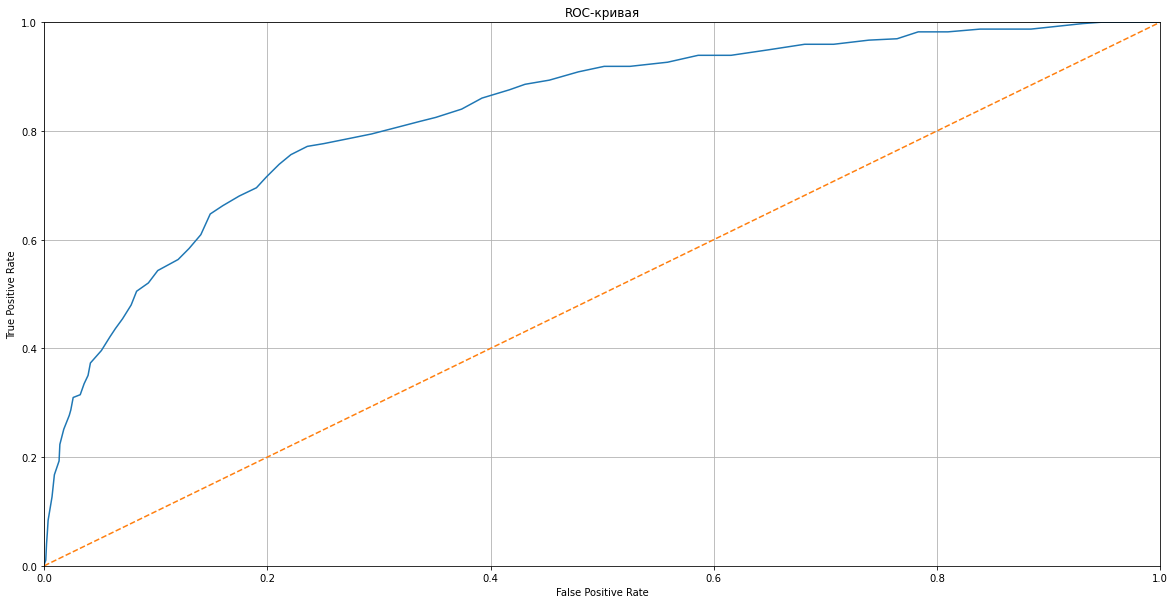

In [92]:
probabilities_valid = model.predict_proba(valid_features_normalized)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(valid_target, probabilities_one_valid)

plt.figure(figsize=(20,10))

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.grid()

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")
plt.show()

In [88]:
for threshold in thresholds:
    probabilities_train = model.predict_proba(train_features_normalized)
    probabilities_one_train = probabilities_train[:, 1]
    predicted_train = probabilities_one_train>threshold

    probabilities_valid = model.predict_proba(valid_features_normalized)
    probabilities_on_valid = probabilities_valid[:, 1]
    predicted_valid = probabilities_one_valid>threshold
    
    accuracy_train=accuracy_score(target_train_downsampled, predicted_train)
    precision_train = precision_score(target_train_downsampled, predicted_train)
    recall_train = recall_score(target_train_downsampled, predicted_train)
    f1_train=f1_score(target_train_downsampled, predicted_train)
    
    accuracy_valid=accuracy_score(valid_target, predicted_valid)
    precision_valid = precision_score(valid_target, predicted_valid)
    recall_valid = recall_score(valid_target, predicted_valid)
    f1_valid=f1_score(valid_target, predicted_valid)
    
    
    #Сохраняем в DataFrame
    statistics_threshold=statistics_threshold.append(pd.Series([threshold, f1_train, f1_valid], 
                                                               index=statistics_threshold.columns),
                                                     ignore_index=True)
    

c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ilka\python-environments\yandex.practicum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', ave

In [91]:
statistics_threshold.sort_values(by='f1_train', ascending=False)

,threshold,f1_train,f1_valid
36,0.500000,1.000000,0.591857
40,0.444444,1.000000,0.556444
39,0.458333,1.000000,0.565693
38,0.472222,1.000000,0.578997
37,0.486111,1.000000,0.588008
...,...,...,...
4,0.958333,0.316667,0.077482
3,0.972222,0.215261,0.020000
2,0.986111,0.102477,0.005063
1,1.000000,0.000000,0.000000


**Вывод**: первая попытка была с использование взвешивания классов позволяет достичь максимальной f1-меры равной 0.58. Использование Upsamping особых результатов не принесло, а вот использование downsamping позволяет повысить f1 на 2% с моделью случайного леса с количеством решателей равным 72. Варьирование порога особых результатов не принесло

# Финальное тестирование

In [110]:
#Объединяем обучающую и валидационную выборки
#возможно валидационную выборку тоже нужно балансировать с помощью downsampling
train_valid_features_normalized=np.concatenate((train_features_normalized, valid_features_normalized))
target_train_valid_downsampled=np.concatenate((target_train_downsampled, valid_target))

In [111]:
model=RandomForestClassifier(n_estimators=72,  random_state=12345)
model.fit(train_valid_features_normalized, target_train_valid_downsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=72,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [113]:
test_features_normalized=scaler.transform(test_features)
predicted_test=model.predict(test_features_normalized)

In [116]:
print('Accuracy: {:.3f}'.format(accuracy_score(test_target, predicted_test)))
print('Precision: {:.3f}'.format(precision_score(test_target, predicted_test)))
print('Recall: {:.3f}'.format(recall_score(test_target, predicted_test)))
print('F1: {:.3f}'.format(f1_score(test_target, predicted_test)))

Accuracy: 0.853
Precision: 0.615
Recall: 0.630
F1: 0.622


**Вывод**: в ходе работы была построена модель для прогнозирования положительного исхода в испытании об уходе клиента из банка. Для этих целей использовались 3 типа моделей: логистическая регрессия, решающее дерево и случайный лес. В ходе предварительного анализа было обнаружено, что в задаче бинарной классификации присутствует дизбаланс классов, количество целевых клиентов в 4 раза меньше чем других. Для устранения данного дизбаланса использовалось взвешивание классов, а также два других подхода: upsampling (расширение выборки) и downsampling (сужение выборки). Наилучший результат по метрики f1 был получен на основании Donwsampling с моделью случайного леса с количеством деревьев, равных 72. В ходе работы также производился анализ влияния изменения порога для класса 1 с целья корректировки способа классификации результата и повышения метрики f1. Выйгрыша в метрики при изменении порога не обнаружено, поэтому пороговое значение осталось равным 0.5. Финальное значение метрики f1=0.62, следовательно, задание можно считать выполненым

# Чек-лист готовности проекта

- [x] Загрузите и подготовьте данные. Поясните порядок действий.
- [x] Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
- [x] Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
- [x] Проведите финальное тестирование.

На что обращают внимание наставники, проверяя проект:

    Как вы готовите данные к обучению? Все ли типы признаков обрабатываете?
    Хорошо ли поясняете этапы предобработки?
    Как исследуете баланс классов?
    Изучаете ли модель без учёта дисбаланса классов?
    Какие выводы об исследовании задачи делаете?
    Корректно ли разбиваете данные на выборки?
    Как работаете с несбалансированными классами?
    Правильно ли проводите обучение, валидацию и финальное тестирование модели?
    Насколько высокое значение F1-меры получаете?
    Изучаете ли значения метрики AUC-ROC?
    Следите за структурой проекта и поддерживаете аккуратность кода?